In [18]:
import os
import sys 
import numpy as np
import matplotlib.pyplot as plt
import sys 
import mdtraj
from nglview import show_ase, show_file, show_mdtraj
import torch

import ase
from ase import Atoms
from ase.constraints import FixBondLengths
from ase.calculators.tip3p import TIP3P, rOH, angleHOH
from ase.md import Langevin
import ase.units as units
from ase.io.trajectory import Trajectory
import numpy as np

from scripts.infer_topology import generate_subgraphs

from scripts.pretrain import pretrain_aimd
from torchmd.interface import Stack, GNNPotentials, GNNPotentialsTrain, PairPotentials
from torchmd.system import System
from torchmd.potentials import ExcludedVolume, LennardJones
from torchmd.observable import Angles
from nff.train import get_model

In [11]:
from ase.lattice.cubic import FaceCenteredCubic, Diamond

In [56]:
def get_unit_len(rho, mass, N_unitcell):
    
    Na = 6.02214086 * 10**23 # avogadro number 

    N = (rho * 10**6 / mass) * Na  # number of molecules in 1m^3 of water 

    rho = N / (10 ** 30) # number density in 1 A^3
 
    L = (N_unitcell / rho) ** (1/3)
    
    return L 

In [114]:
get_unit_len(2.309, 28.0855, 8)

5.4466872010888405

In [115]:
get_unit_len(2.327, 28.0855, 8)

5.4326069473229746

In [116]:
size = 5

atoms = Diamond(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                              symbol='Si',
                              size=(size, size, size),
                              latticeconstant=5.4326069473229746,
                              pbc=True)

In [117]:
    xnew = np.linspace(start, end, nbins)
        # initialize observable function 
    obs = rdf(system, nbins, (start, end) )

In [118]:
xyz = torch.Tensor( atoms.get_positions() )[None, ...]

In [119]:
system = System(atoms, device='cpu')

In [120]:
# compute tetrahedron order parameter 

angle_obs = Angles(system, 100, (0.0, 3.1), cutoff=3.25)
cos_angle = angle_obs(xyz)
tetra_order  = 1 -  (3/8) * (cos_angle + 1/3).pow(2).mean()

In [121]:
from torchmd.observable import rdf 

start = 0.0
end = 10.0
nbins = 200

xnew = np.linspace(start, end, nbins)
    # initialize observable function 
obs = rdf(system, nbins, (start, end) )

In [122]:
_, bins , g = obs(xyz)

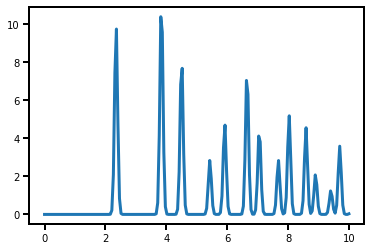

In [123]:
plt.plot(xnew, g.numpy())

In [124]:
rdf_data = np.stack( (xnew, g.numpy()), -1)

In [125]:
np.savetxt('../data/a-Si/102K_2.327_exp.csv', rdf_data, delimiter=",")

In [126]:
data1 = np.loadtxt('../data/a-Si/800K_2.309_exp.csv',  delimiter=",")

In [127]:
data2 = np.loadtxt('../data/a-Si/102K_2.327_exp.csv',  delimiter=",")

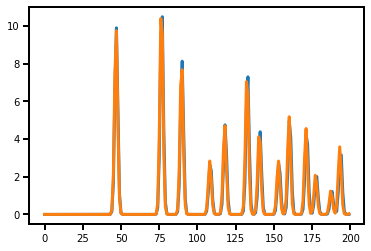

In [128]:
plt.plot(data1[:, 1])
plt.plot(data2[:, 1])